# Project: Forecasting Electricity Prices using ARIMA Model

## Project Idea

The main idea is to forecast the electricity prices as it effect the decision making mechanism of the energy companies. The project is based on the AutoregRessive Integrated Moving Average (ARIMA) model. The data is collected from the U.S. Energy Information Administration (EIA) webiste https://www.eia.gov/about/.

## Loading the data

First loading all the required packages.

In [32]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

Importing data from the csv file and parsing the time spring. The data is dated from 2000-01-01 to 2017-07-01. The unit for price is cents per kilowatthour (kWh). 

In [33]:
def parser(x):
	return datetime.strptime( x, '%Y-%m')
y = read_csv('Load_price.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(y)

Year
2000-01-01     6.93
2000-02-01     6.96
2000-03-01     7.03
2000-04-01     7.05
2000-05-01     7.25
2000-06-01     7.70
2000-07-01     7.76
2000-08-01     7.93
2000-09-01     7.73
2000-10-01     7.67
2000-11-01     7.34
2000-12-01     7.52
2001-01-01     7.25
2001-02-01     7.51
2001-03-01     7.70
2001-04-01     7.73
2001-05-01     7.77
2001-06-01     8.13
2001-07-01     8.41
2001-08-01     8.35
2001-09-01     8.22
2001-10-01     8.27
2001-11-01     7.73
2001-12-01     7.66
2002-01-01     7.49
2002-02-01     7.68
2002-03-01     7.72
2002-04-01     7.68
2002-05-01     7.84
2002-06-01     8.18
              ...  
2015-02-01    10.62
2015-03-01    10.63
2015-04-01    10.37
2015-05-01    10.47
2015-06-01    10.89
2015-07-01    11.07
2015-08-01    10.94
2015-09-01    10.98
2015-10-01    10.73
2015-11-01    10.30
2015-12-01    10.13
2016-01-01    10.02
2016-02-01    10.20
2016-03-01    10.16
2016-04-01    10.13
2016-05-01    10.25
2016-06-01    10.59
2016-07-01    10.62
2016-08-01    1

The data is then visualized.

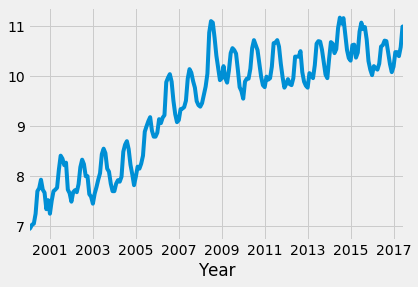

In [34]:
y.plot()
plt.show()

## Fitting seasonal ARIMA model

The seasonal ARIMA model is used here for the time series forecasting to deal with the seasonal effects in the data. Here, order = (p, d, q) are the non-seasonal parameters, while seasonal_order = (P, D, Q, s) are the seasonal component of the time series. p,P is the auto-regressive part of the model, d,D is the integrated part of the model and q,Q is the moving average part of the model. s is for the periodicity of the time series.

In [35]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9810      0.017     58.239      0.000       0.948       1.014
ma.S.L12      -0.6712      0.068     -9.890      0.000      -0.804      -0.538
sigma2         0.0121      0.001     11.641      0.000       0.010       0.014


To ensure the performance of the slected parameters, we run a daignostic test for the model.

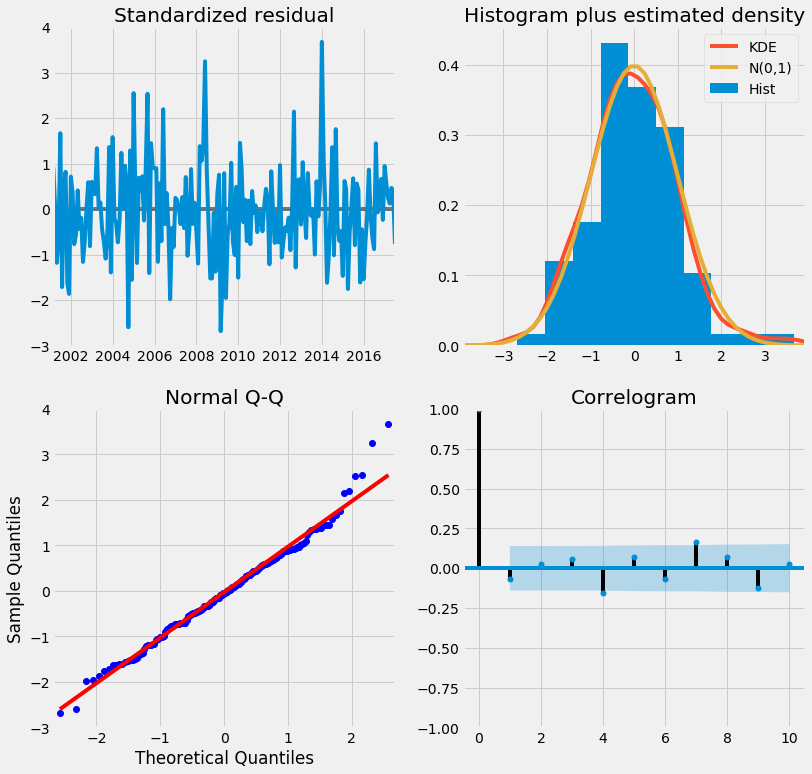

In [36]:
results.plot_diagnostics(figsize=(12, 12))
plt.show()

The diagnostics test shows that the model residuals are normally distributed and model produces a satisfactory fit.

## Testing the model

The next step is to divide the data into train and test data and observe the performance of the model. The test data consists the time after the date 2015-01-01. 

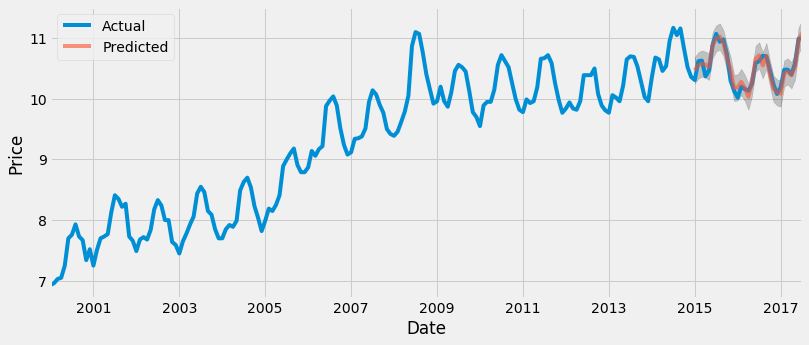

In [39]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2000':].plot(label='Actual', figsize=(12, 5))
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.6)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()


## Forecasting the future values

Here we are forecsting the future values using our model.

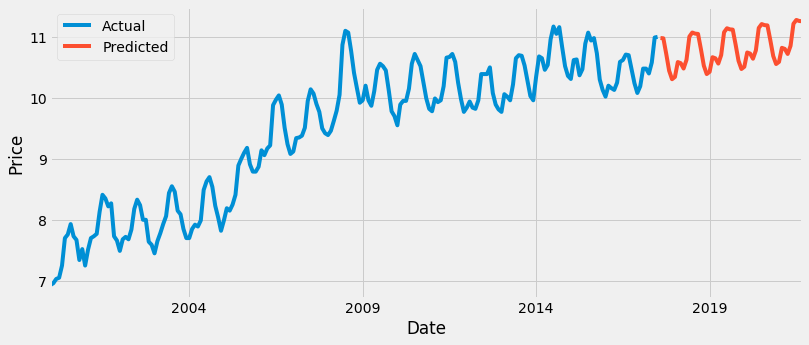

In [40]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Actual', figsize=(12, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicted')

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()